In [3]:
import numpy as np  
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout 
from tensorflow.keras.models import Model
import tensorflow as tf

## Load in Data

In [4]:
# Load in Dataset
fashion_mnist = tf.keras.datasets.fashion_mnist

# Split into training and testing data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
print("x_train.shape:", x_train.shape)

4422102/4422102 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [5]:
# Remember convolutioin expects a height x and width x and color
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1) #-1 means last dimension
print("x_train.shape:", x_train.shape)

x_train.shape: (60000, 28, 28, 1)


In [6]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


## Build Model

In [7]:
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
x = Conv2D(128, (3,3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i,x)

## Compile and fit

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15


2024-01-22 13:38:51.878432: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1875/1875 [==============================] - 14s 7ms/step - loss: 0.5245 - accuracy: 0.8054 - val_loss: 0.3875 - val_accuracy: 0.8551
Epoch 2/15
1875/1875 [==============================] - 16s 9ms/step - loss: 0.3652 - accuracy: 0.8617 - val_loss: 0.3520 - val_accuracy: 0.8715
Epoch 3/15
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3166 - accuracy: 0.8806 - val_loss: 0.3249 - val_accuracy: 0.8805
Epoch 4/15
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2839 - accuracy: 0.8938 - val_loss: 0.2961 - val_accuracy: 0.8899
Epoch 5/15
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2577 - accuracy: 0.9041 - val_loss: 0.2907 - val_accuracy: 0.8974
Epoch 6/15
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2378 - accuracy: 0.9100 - val_loss: 0.2812 - val_accuracy: 0.9007
Epoch 7/15
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2175 - accuracy: 0.9178 - val_loss: 0.2785 - val_accuracy: 0.8

## Plot loss per iteration

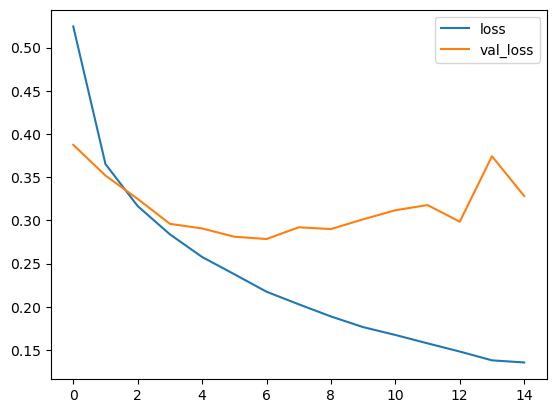

In [9]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

This shows our model is overfitting as our validation set loss is increasing over time

## Plot Accuracy per iteration

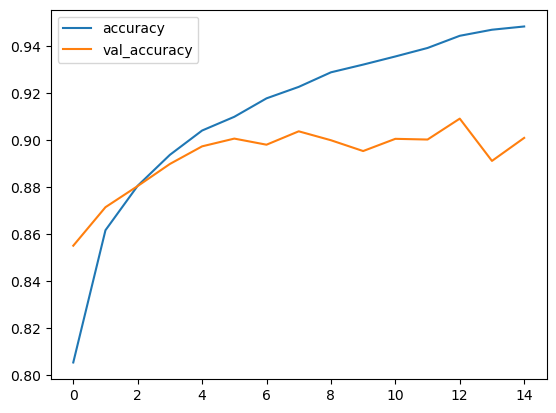

In [10]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

This shows our accuracy stays consistent since our loss is going up. This can mean that our model is becoming more confident in its incorrect results

## Plotting Confusion Matrix

313/313 [==============================] - 1s 3ms/step
Confusion Matrix, without normalization
[[833   2  29  30   1   1  97   0   7   0]
 [  4 976   0  12   5   0   2   0   1   0]
 [ 14   1 895   9  33   0  48   0   0   0]
 [  6  11  16 913  29   0  21   0   3   1]
 [  0   1  64  19 871   0  44   0   1   0]
 [  0   0   0   4   0 977   0  11   2   6]
 [107   1  82  31 116   1 654   0   8   0]
 [  0   0   0   0   0  11   0 978   0  11]
 [  3   1   3   3   5   3   3   1 978   0]
 [  1   0   0   0   0  10   0  54   0 935]]


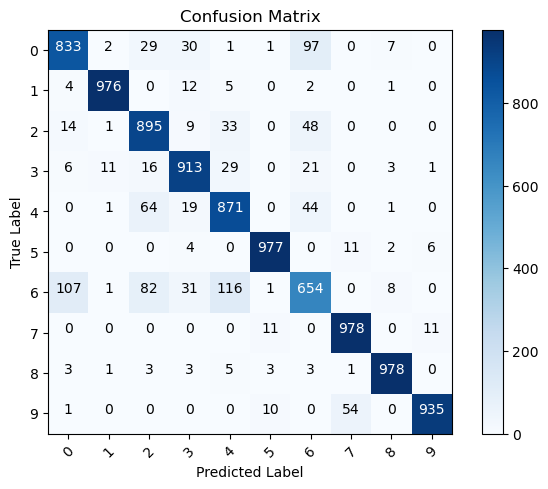

In [11]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix, without normalization")
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks= np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh= cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i,j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i,j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

This shows our model is messing up the following heavily:
- True Label 6 is the largest with (1000-654) = 346 misclassifications
- True Label 0  

This means we are missclassifying a lot of shirts in our model with things such as tshirt,pullover, and coats

## Label Mapping

In [12]:
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split()

Text(0.5, 1.0, 'True label: Shirt Predicted: Pullover')

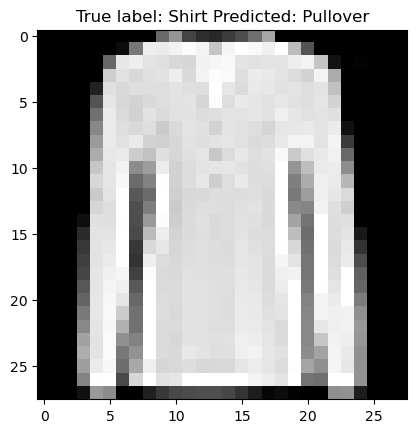

In [14]:
# misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]))